# Exercise #1

In [1]:
function poly_eval(a,x)
    temp = 0
    for i in 1:length(a) 
        temp += a[i]*(x^(i-1))
    end
    return temp
end

poly_eval (generic function with 1 method)

In [2]:
function horner_recursive(a,x,index)
    if(index != length(a)-1)
        return a[index]+x*horner_recursive(a,x,index+1)
    else
        return a[index]+x*a[index+1]
    end
end

function horner(a,x)
    return horner_recursive(a,x,1)
end

horner (generic function with 1 method)

In [3]:
#Test
data = rand(10)
for i in 1:10
    @assert abs(horner(data,i)-poly_eval(data,i))<1e-3
end

In [4]:
#benchmark
using BenchmarkTools
a = 1:10
x = 4

4

In [5]:
@btime poly_eval($a,$x)

  37.059 ns (0 allocations: 0 bytes)


3378745

In [6]:
@btime horner($a,$x)

  18.437 ns (0 allocations: 0 bytes)


3378745

# Exercise #2

In [7]:
function sqrtYield(x,y)
    return 0.5*(x+y/x)
end


sqrtYield (generic function with 1 method)

In [8]:
n = 10 #迭代次数
x = 1.1
y = 6
for i in 1:n
    #@assert sqrtYield(x,y)>x
    @show x = sqrtYield(x,y)
end
#断言失败，说明jmd中第二点似乎不正确，该算法的迭代过程虽然收敛，但是可能是震荡或单调递减的。

x = sqrtYield(x, y) = 3.2772727272727273
x = sqrtYield(x, y) = 2.554031647963687
x = sqrtYield(x, y) = 2.4516293031812424
x = sqrtYield(x, y) = 2.4494906763906146
x = sqrtYield(x, y) = 2.449489742783356
x = sqrtYield(x, y) = 2.449489742783178
x = sqrtYield(x, y) = 2.449489742783178
x = sqrtYield(x, y) = 2.449489742783178
x = sqrtYield(x, y) = 2.449489742783178
x = sqrtYield(x, y) = 2.449489742783178


In [9]:
function babylon(x0,y,ϵ)
    xarr = []
    while abs(sqrt(y)-x0) > ϵ
        x0 = 0.5*(x0+(y/x0))
        push!(xarr,x0)
    end
    return xarr
end

babylon (generic function with 1 method)

In [10]:
#Tests
ϵ = 1e-3
for y in 2:1000 
    xarr = babylon(1.4,y,ϵ)
    @assert xarr[length(xarr)]-sqrt(y)<=ϵ
end

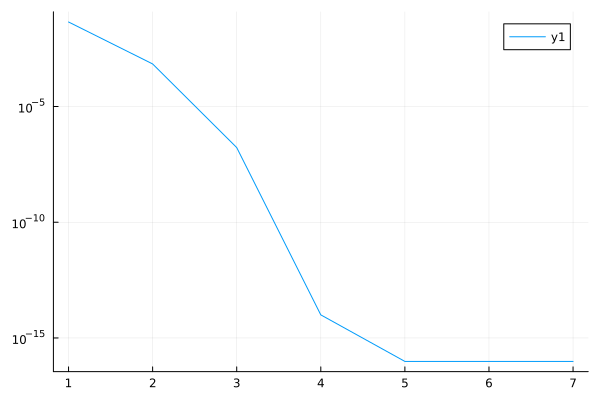

In [16]:
using Plots
function absdiff(x,n)
    return abs(x - n)
end
plot(absdiff.(babylon(big(1.1),big(2),1e-75),sqrt(2)))
plot!(yscale=:log10)

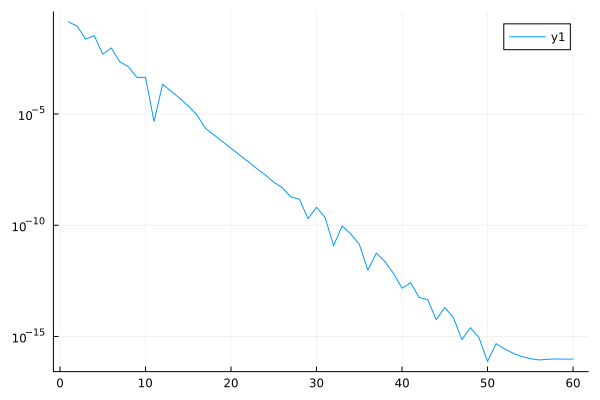

In [12]:
using Plots
function bisection(f,a,b,ϵ)
    xarr = []
    if(sign(f(a)) == sign(f(b)))
        error("Must be identical sign")
    end
    while(abs(a-b)>ϵ)
        m = (a+b)/2
        if(sign(f(a)) == sign(f(m)))
            (a,b) = (m,b)
        else
            (a,b) = (a,m)
        end
        push!(xarr,m)
    end
    return xarr
end
function f(x)
    return x^2-2
end
plot(absdiff.(bisection(f,big(1.1),big(2),1e-18),sqrt(2)))
plot!(yscale=:log10)

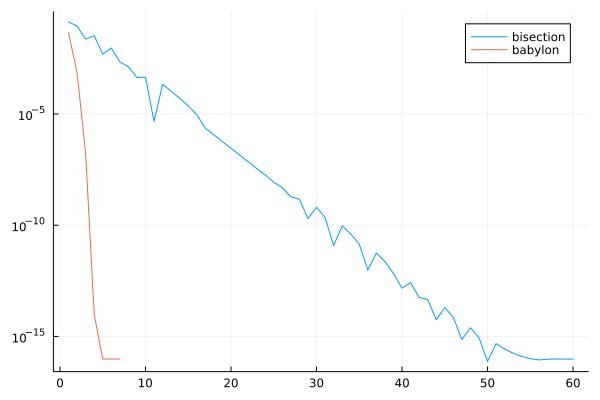

In [21]:
plot(absdiff.(bisection(f,big(1.1),big(2),1e-18),sqrt(2)),label="bisection")
plot!(absdiff.(babylon(big(1.1),big(2),1e-75),sqrt(2)),label="babylon")
plot!(yscale=:log10)

In [14]:
xarr = babylon(big(1.1),big(2),1e-75)
δarr = [x-sqrt(2) for x in xarr]
for i in 1:length(δarr)-1
    @show δarr[i+1]-δarr[i]^2
end

δarr[i + 1] - δarr[i] ^ 2 = -0.001323828624358088758172942515385880572234348368275956953368626675273145019558403
δarr[i + 1] - δarr[i] ^ 2 = -3.079870797045375199905662707386945624327847658754186793278991653341220195164355e-07
δarr[i + 1] - δarr[i] ^ 2 = -1.841082923039134029116407596299986559243445813262928422022279826181531447828837e-14
δarr[i + 1] - δarr[i] ^ 2 = -9.66729331345920592282430745416473298130586981211481966429593593208028542756431e-17
δarr[i + 1] - δarr[i] ^ 2 = -9.667293313452913971752768942453792626670250228116636710010351513827269770136269e-17
δarr[i + 1] - δarr[i] ^ 2 = -9.667293313452913971752768943139609650134391178616508050131505663481586155230788e-17
